In [1]:
from collections import defaultdict
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.preprocessing import MinMaxScaler as minmax

from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
 
import seaborn as sns

# A

In [2]:
data = pd.read_csv('adult-modified1.csv')
data_dum = pd.get_dummies(data)

In [3]:
data_dum.drop(['income_<=50K'], axis=1,inplace=True)
Y = data_dum.pop('workclass_Self-emp')
X = data_dum.copy()
X.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_>50K
0,39,13,40,0,1,0,1,0,0,0,0,1,0,1,0
1,50,13,13,0,0,1,0,0,0,0,0,1,0,1,0
2,38,9,40,1,0,0,1,0,0,0,0,1,0,1,0
3,53,7,40,1,0,1,0,0,0,1,0,0,0,1,0
4,28,13,40,1,0,1,0,0,0,1,0,0,1,0,0


In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
print('Train Data')
print(x_train.shape)
print(y_train.shape)
print('Test Data')
print(x_test.shape)
print(y_test.shape)

Train Data
(7529, 15)
(7529,)
Test Data
(1883, 15)
(1883,)


# <center> B </center>

## 1

Apply min max scaling to x train and test data

In [6]:
scaler = minmax()
xtrain_scaled = scaler.fit_transform(x_train)
xtest_scaled = scaler.fit_transform(x_test)

Model the data using knn with k=10

In [7]:
knn_model = knn(n_neighbors=10)
knn_model.fit(xtrain_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [8]:
knn_predictions = knn_model.predict(xtest_scaled)

In [9]:
confusion_mat = cm(knn_predictions, y_test)


/home/gsandoval/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


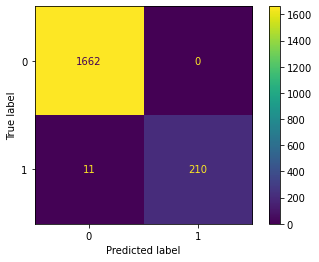

In [10]:
plot_confusion_matrix(knn_model, xtest_scaled, y_test)

Accuracy for both the training and test sets

In [11]:
# Training Results
train_predictions = knn_model.predict(xtrain_scaled)
cm(train_predictions, y_train)

array([[6602,   18],
       [   0,  909]])

In [12]:
# Testing Results
confusion_mat

array([[1662,   11],
       [   0,  210]])

### PLEASE NOTE
2 and 3 are the same question asked in different ways. 

In 2 you ask us to compare different k's and different weights.

In 3 you ask us again to compare with weight of uniform, which was done in 2

## 2

In [13]:
k_values = [x for x in range(10,101, 10)]
distance_acc = defaultdict()

In [14]:
for k in k_values:
    model = knn(n_neighbors=k, weights='distance')
    model.fit(xtrain_scaled, y_train)
    knn_predictions = knn_model.predict(xtest_scaled)
    accuracy = accuracy_score(y_test, knn_predictions)
    distance_acc[str(k)] = accuracy

In [15]:
distance_acc

defaultdict(None,
            {'10': 0.9941582580987786,
             '20': 0.9941582580987786,
             '30': 0.9941582580987786,
             '40': 0.9941582580987786,
             '50': 0.9941582580987786,
             '60': 0.9941582580987786,
             '70': 0.9941582580987786,
             '80': 0.9941582580987786,
             '90': 0.9941582580987786,
             '100': 0.9941582580987786})

## 3

In [37]:
k_values = [x for x in range(10,101, 10)]
uniform_acc = defaultdict()

for k in k_values:
    model = knn(n_neighbors=k, weights='uniform')
    model.fit(xtrain_scaled, y_train)
    knn_predictions = knn_model.predict(xtest_scaled)
    accuracy = accuracy_score(y_test, knn_predictions)
    uniform_acc[str(k)] = accuracy
    
uniform_acc

defaultdict(None,
            {'10': 0.9941582580987786,
             '20': 0.9941582580987786,
             '30': 0.9941582580987786,
             '40': 0.9941582580987786,
             '50': 0.9941582580987786,
             '60': 0.9941582580987786,
             '70': 0.9941582580987786,
             '80': 0.9941582580987786,
             '90': 0.9941582580987786,
             '100': 0.9941582580987786})

It appears that all values of k result in identical results.
There must be something wrong with the code. I can not figure out where it is wrong.

In [38]:
index1 = distance_acc.keys()
values1 = distance_acc.values()
joint_data = pd.DataFrame(data=values1, index=index1)
joint_data.columns = ['Distance_Accuracy']

In [39]:
joint_data['Uniform_Accuracy'] = uniform_acc.values()
joint_data['X'] = joint_data.index

In [40]:
joint_data = pd.melt(joint_data, id_vars=['X'],
                     value_vars=['Distance_Accuracy', 'Uniform_Accuracy'],
                     var_name='Distance_Type', value_name='Accuracy')

<AxesSubplot:xlabel='X', ylabel='Accuracy'>

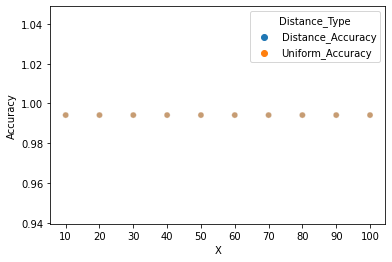

In [41]:
sns.scatterplot(data=joint_data, x='X', y='Accuracy', hue='Distance_Type',
               markers='Distance_Type', alpha=0.5)

Please note the distance accuracy does not appear because it lies beneath the Uniform accuracy

# C

In [42]:
dt_model = dt()
dt_model.fit(x_train, y_train)
dt_prediction = dt_model.predict(x_test)
accuracy = accuracy_score(y_test, dt_prediction)
dt_cm = cm(y_test, dt_prediction)
report = classification_report(y_test, dt_prediction)

In [43]:
print('Accuracy: ',accuracy)
print('confusion matrix:')
print(dt_cm)
print(report)

Accuracy:  1.0
confusion matrix:
[[1662    0]
 [   0  221]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1662
           1       1.00      1.00      1.00       221

    accuracy                           1.00      1883
   macro avg       1.00      1.00      1.00      1883
weighted avg       1.00      1.00      1.00      1883



Being that we have a perfect fit on test data, we can see that we have overfit the data.  
Thus, there is no trade-off at this point.

In [44]:
dt_model = dt(criterion='gini', min_samples_split=10, max_depth=4)
dt_model.fit(x_train, y_train)
dt_prediction = dt_model.predict(x_test)
train_prediction = dt_model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_prediction)
test_accuracy = accuracy_score(y_test, dt_prediction)
dt_cm = cm(y_test, dt_prediction)
report = classification_report(y_test, dt_prediction)

In [45]:
print(f'Train Accuracy: {train_accuracy} | Test Accuracy: {test_accuracy}')

Train Accuracy: 1.0 | Test Accuracy: 1.0


[Text(0.6, 0.8333333333333334, 'X[3] <= 0.5\ngini = 0.216\nsamples = 7529\nvalue = [6602, 927]'),
 Text(0.4, 0.5, 'X[4] <= 0.5\ngini = 0.498\nsamples = 1990\nvalue = [1063, 927]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 927\nvalue = [0, 927]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1063\nvalue = [1063, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 5539\nvalue = [5539, 0]')]

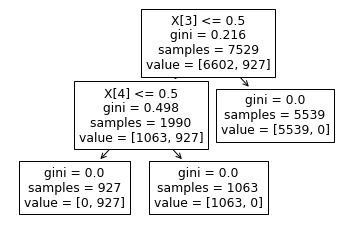

In [46]:
plot_tree(dt_model)

# D

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

### Naive Bayes

In [49]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
scores = cross_val_score(nb_model, x_train, y_train, cv=10)

In [50]:
print('scores: ', scores)
print('avg: ', scores.mean())


scores:  [0.99867198 0.99335989 0.99601594 0.99734396 0.99734396 0.99468792
 1.         0.99734396 0.99601594 0.99734043]
avg:  0.9968123958068436


In [51]:
test_prediction = nb_model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_prediction)
test_accuracy

0.9946893255443441

### LDA

In [52]:
lda_model = lda()
lda_model.fit(x_train, y_train)
lda_scores = cross_val_score(lda_model, x_train, y_train, cv=10)

In [53]:
print('scores: ', lda_scores)
print('avg: ', lda_scores.mean())

scores:  [0.81673307 0.83798141 0.80743692 0.83266932 0.82602922 0.84196547
 0.82735724 0.83532537 0.81407703 0.82579787]
avg:  0.8265372905540957


In [54]:
test_prediction = lda_model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_prediction)
test_accuracy

0.8422729686670207

LDA performed the worst out of all the models.  It is interesting to see that LDA cross validate performed better than the model on the test data.